In [10]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
sys.path.insert(0, "..")
import random
import src.utils.dtw as dtw
import src.models.augmentations as augmentations
import src.visualization.visualize as visualize
import src.utils.data_extraction as extractions


# Data import


In [11]:
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)
# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

# Data augmentation

## Jitering

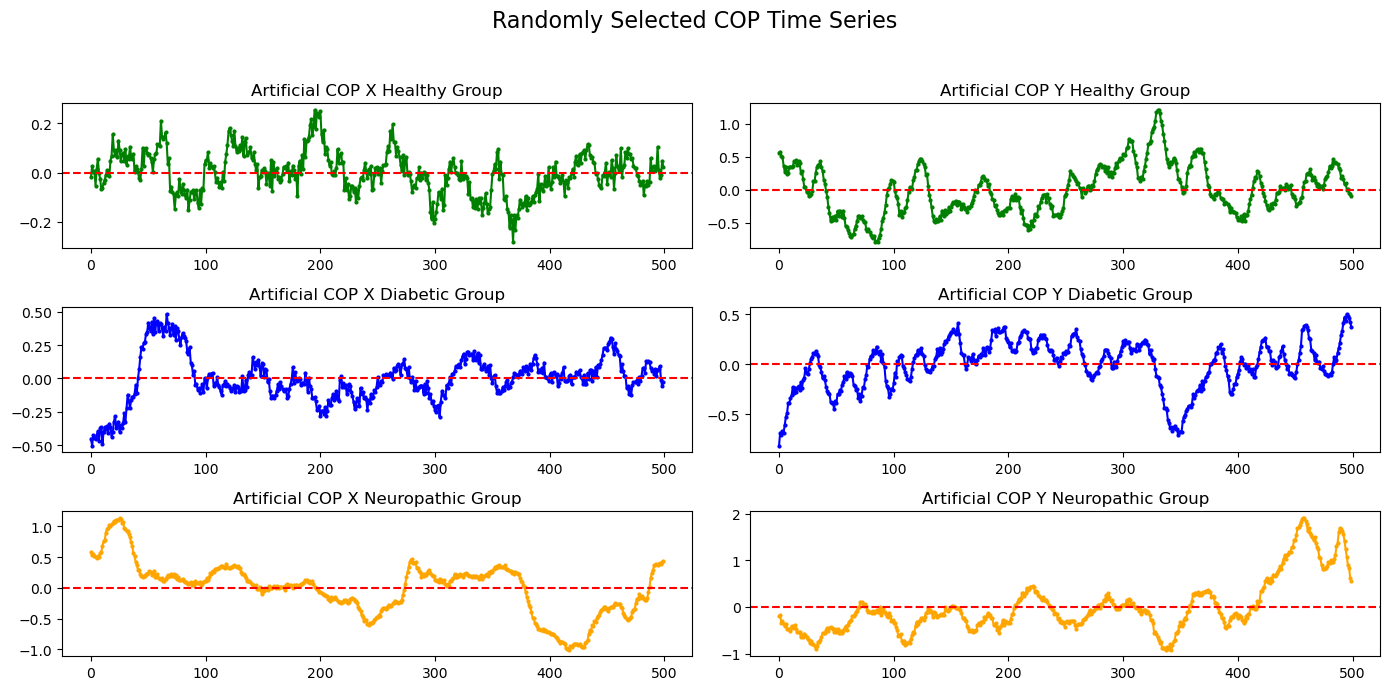

In [3]:
# Aplicar ruido gaussiano a las series de tiempo
noisy_healthy_cop_x = augmentations.augment_time_series_with_noise(healthy_cop_x, 1600)
noisy_neuropathic_cop_x = augmentations.augment_time_series_with_noise(neuropathic_cop_x, 1600)
noisy_diabetic_cop_x = augmentations.augment_time_series_with_noise(diabetic_cop_x, 1600)

noisy_healthy_cop_y = augmentations.augment_time_series_with_noise(healthy_cop_y, 1600)
noisy_neuropathic_cop_y = augmentations.augment_time_series_with_noise(neuropathic_cop_y, 1600)
noisy_diabetic_cop_y = augmentations.augment_time_series_with_noise(diabetic_cop_y, 1600)

# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(noisy_healthy_cop_x)-1)
diabetic_random_number = random.randint(0, len(noisy_diabetic_cop_x)-1)
neuropathic_random_number = random.randint(0, len(noisy_diabetic_cop_x)-1)

# Graficar las series de tiempo con ruido
visualize.plot_cop_time_series(noisy_healthy_cop_x[healthy_random_number], noisy_healthy_cop_y[healthy_random_number],
                     noisy_diabetic_cop_x[diabetic_random_number], noisy_diabetic_cop_y[diabetic_random_number],
                     noisy_neuropathic_cop_x[neuropathic_random_number], noisy_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_jittered_data')

In [4]:
# Crear DataFrames de datos reales y aumentados
real_data = pd.DataFrame({
    'cop_x': pd.concat([healthy_cop_x, neuropathic_cop_x, diabetic_cop_x]),
    'cop_y': pd.concat([healthy_cop_y, neuropathic_cop_y, diabetic_cop_y]),
    'class': ['Healthy'] * len(healthy_cop_x) + ['Neuropathic'] * len(neuropathic_cop_x) + ['Diabetic'] * len(diabetic_cop_x),
    'flag': 'real'
})


noisy_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(noisy_healthy_cop_x), pd.Series(noisy_neuropathic_cop_x), pd.Series(noisy_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(noisy_healthy_cop_y), pd.Series(noisy_neuropathic_cop_y), pd.Series(noisy_diabetic_cop_y)]),
    'class': ['Healthy'] * len(noisy_healthy_cop_x) + ['Neuropathic'] * len(noisy_neuropathic_cop_x) + ['Diabetic'] * len(noisy_diabetic_cop_x),
    'flag': 'augmented'
})

In [5]:
noisy_data.to_json('../data/processed/noisy_data.json', orient='records', lines=True)

### Feature extraction

In [6]:
extractions.add_acceleration_columns(noisy_data)

Calculando aceleraciones:   0%|          | 0/5001 [00:00<?, ?it/s]

Calculando aceleraciones: 100%|██████████| 5001/5001 [00:00<00:00, 10181.99it/s]


### Plotting

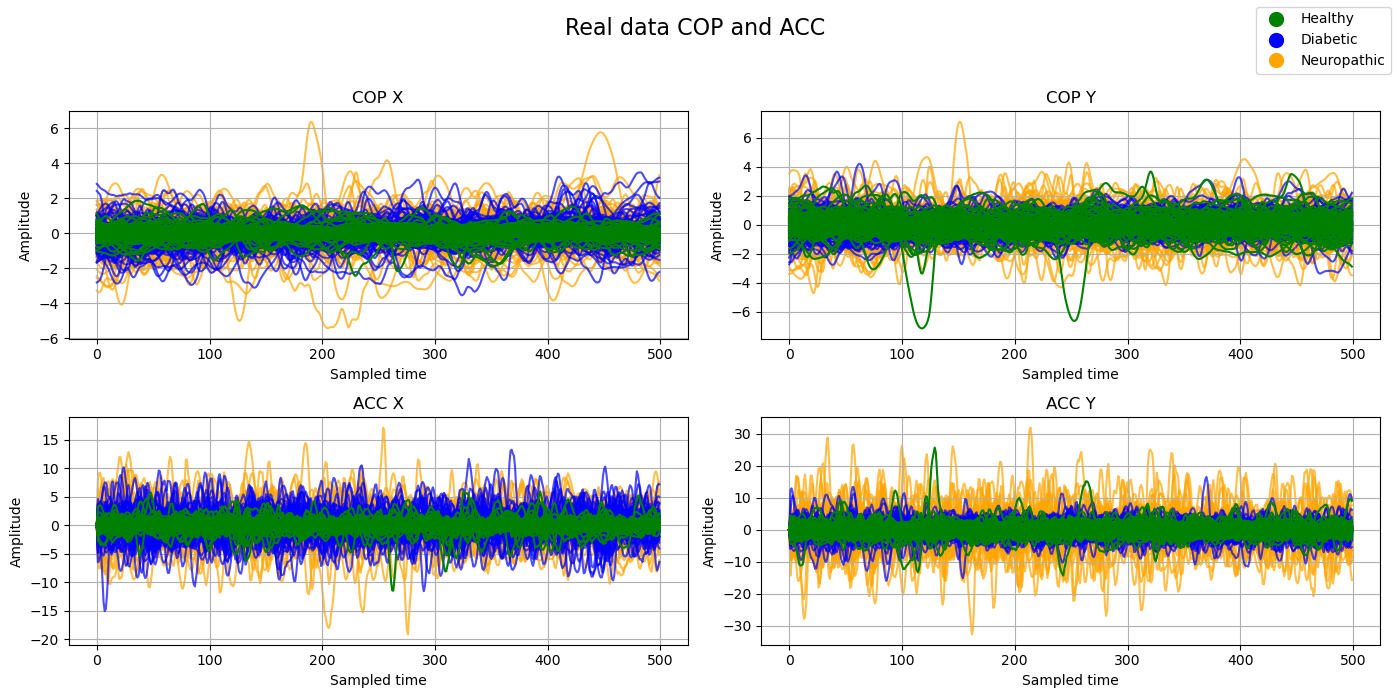

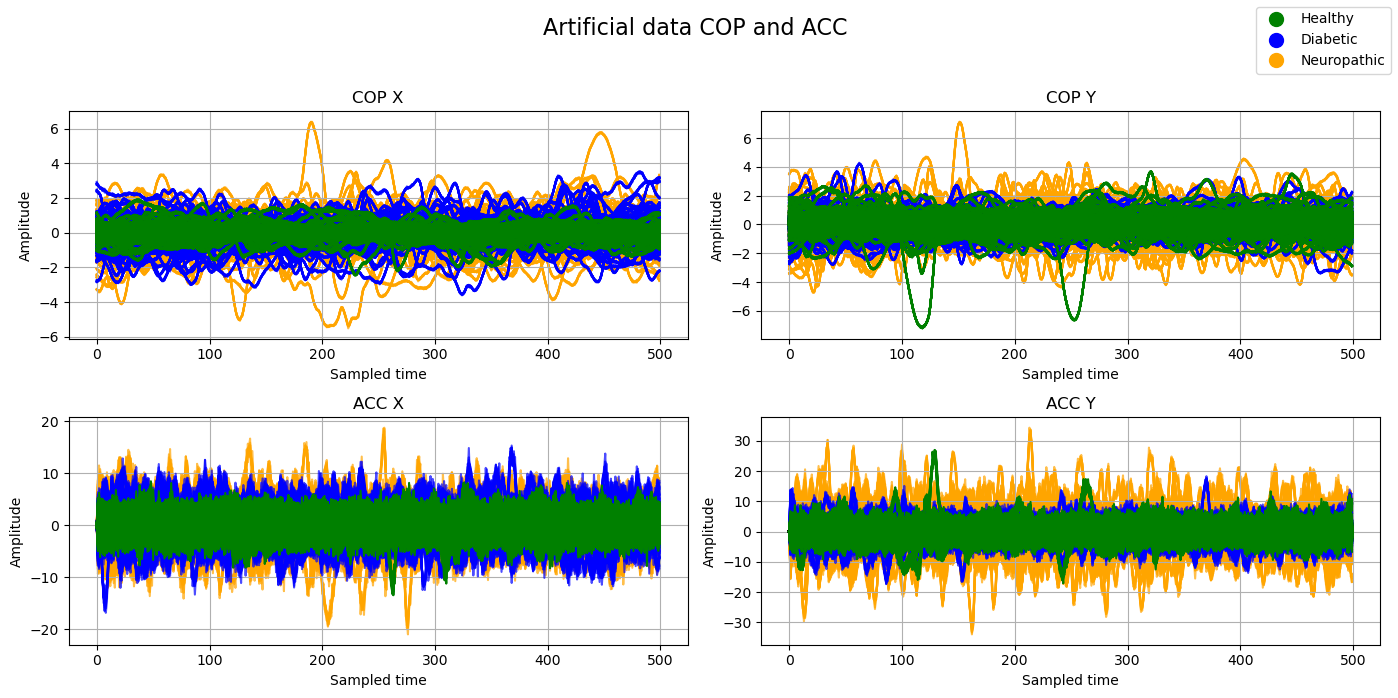

In [7]:
visualize.plot_cop_and_acc_time_series(timeSeries, alt_title='Real data COP and ACC', export_filename='cop_acc_real_series')
visualize.plot_cop_and_acc_time_series( noisy_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_jittered_series')

## Flipping


In [7]:
flipped_healthy_cop_x = augmentations.flip_time_series_set(healthy_cop_x)
flipped_neuropathic_cop_x = augmentations.flip_time_series_set(neuropathic_cop_x)
flipped_diabetic_cop_x = augmentations.flip_time_series_set(diabetic_cop_x)

flipped_healthy_cop_y = augmentations.flip_time_series_set(healthy_cop_y)
flipped_neuropathic_cop_y = augmentations.flip_time_series_set(neuropathic_cop_y)
flipped_diabetic_cop_y = augmentations.flip_time_series_set(diabetic_cop_y)



flipped_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(flipped_healthy_cop_x), pd.Series(flipped_neuropathic_cop_x), pd.Series(flipped_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(flipped_healthy_cop_y), pd.Series(flipped_neuropathic_cop_y), pd.Series(flipped_diabetic_cop_y)]),
    'class': ['Healthy'] * len(flipped_healthy_cop_x) + ['Neuropathic'] * len(flipped_neuropathic_cop_x) + ['Diabetic'] * len(flipped_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.get_features(flipped_data)

### Plotting

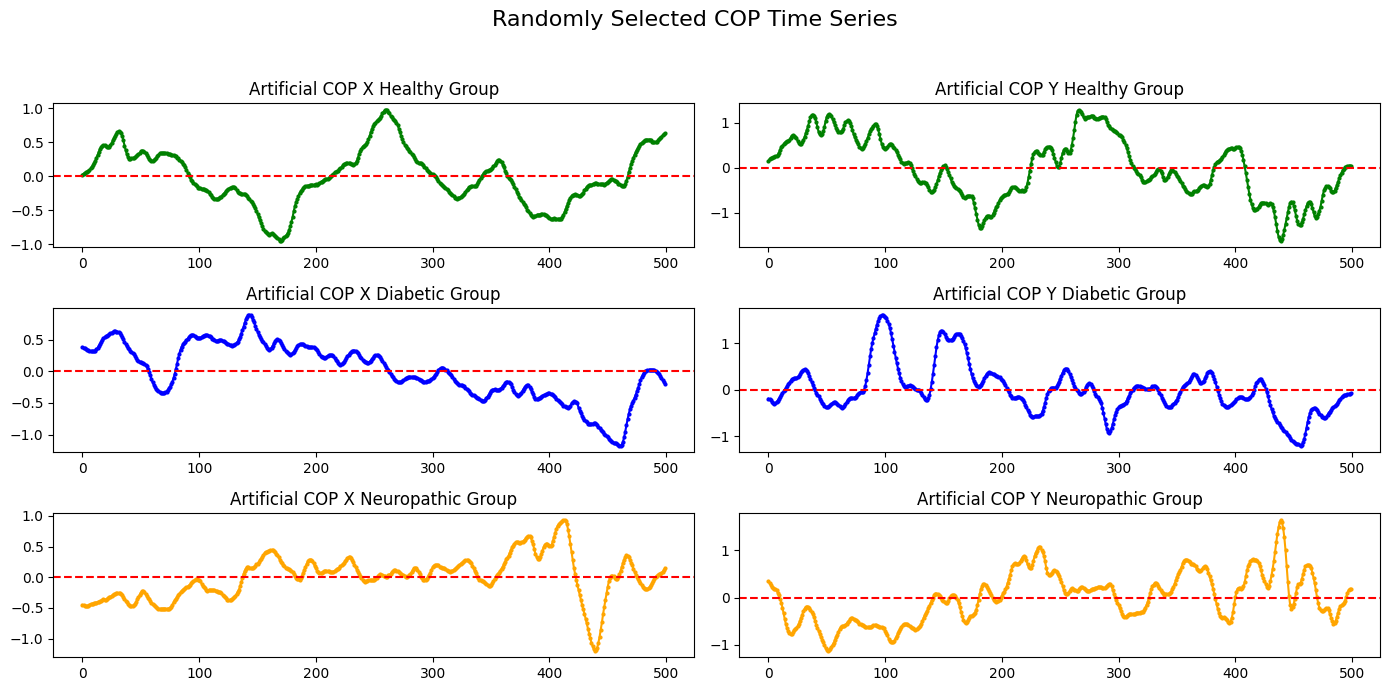

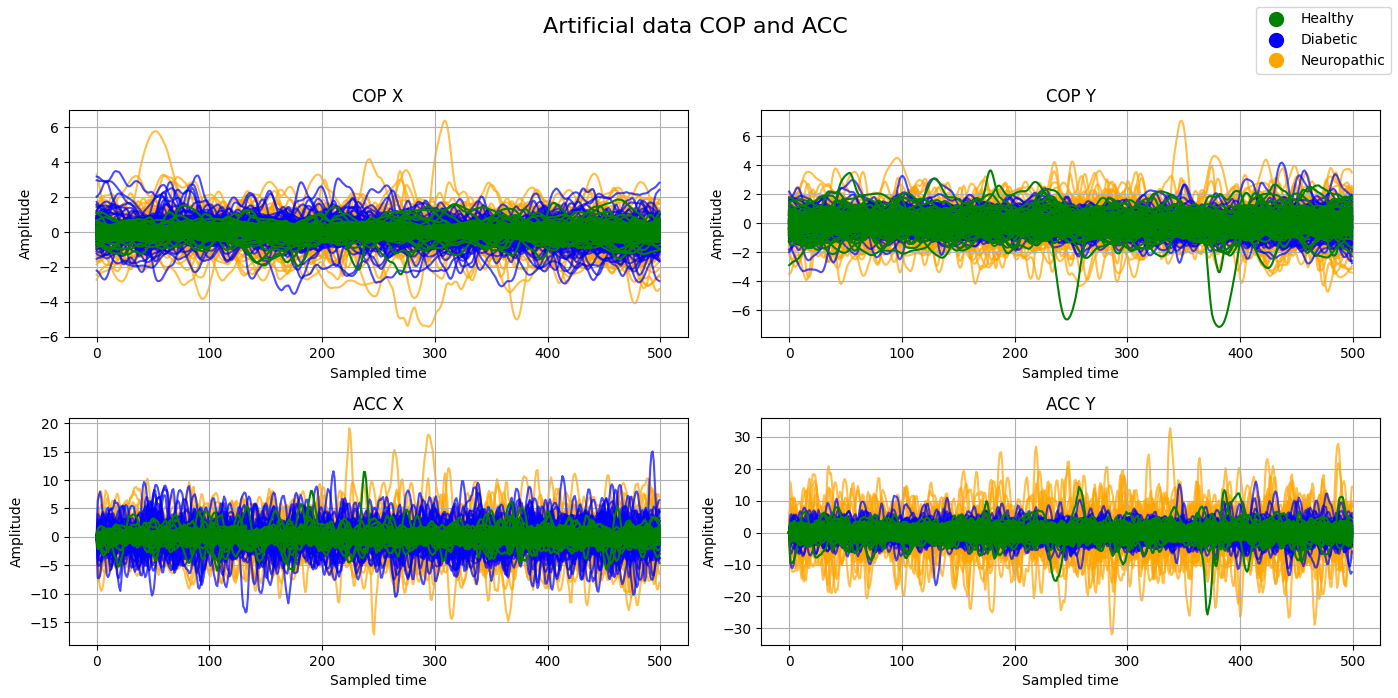

In [8]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(flipped_healthy_cop_x))
diabetic_random_number = random.randint(0, len(flipped_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(flipped_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(flipped_healthy_cop_x[healthy_random_number], flipped_healthy_cop_y[healthy_random_number],
                     flipped_diabetic_cop_x[diabetic_random_number], flipped_diabetic_cop_y[diabetic_random_number],
                     flipped_neuropathic_cop_x[neuropathic_random_number], flipped_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_flipped_series')
visualize.plot_cop_and_acc_time_series(flipped_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_flipped_series')

### Exportation

In [9]:
flipped_data.to_json('../data/processed/flipped_data.json', orient='records', lines=True)


## Scaling

In [8]:
scaled_healthy_cop_x = augmentations.scaling(healthy_cop_x, num_samples=1600)
scaled_neuropathic_cop_x = augmentations.scaling(neuropathic_cop_x, num_samples=1600)
scaled_diabetic_cop_x = augmentations.scaling(diabetic_cop_x, num_samples=1600)

scaled_healthy_cop_y = augmentations.scaling(healthy_cop_y, num_samples=1600)
scaled_neuropathic_cop_y = augmentations.scaling(neuropathic_cop_y, num_samples=1600)
scaled_diabetic_cop_y = augmentations.scaling(diabetic_cop_y, num_samples=1600)



scaled_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(scaled_healthy_cop_x), pd.Series(scaled_neuropathic_cop_x), pd.Series(scaled_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(scaled_healthy_cop_y), pd.Series(scaled_neuropathic_cop_y), pd.Series(scaled_diabetic_cop_y)]),
    'class': ['Healthy'] * len(scaled_healthy_cop_x) + ['Neuropathic'] * len(scaled_neuropathic_cop_x) + ['Diabetic'] * len(scaled_diabetic_cop_x),
    'flag': 'augmented'
})

In [9]:
extractions.add_acceleration_columns(scaled_data)

Calculando aceleraciones: 100%|██████████| 4367/4367 [00:00<00:00, 9882.55it/s]


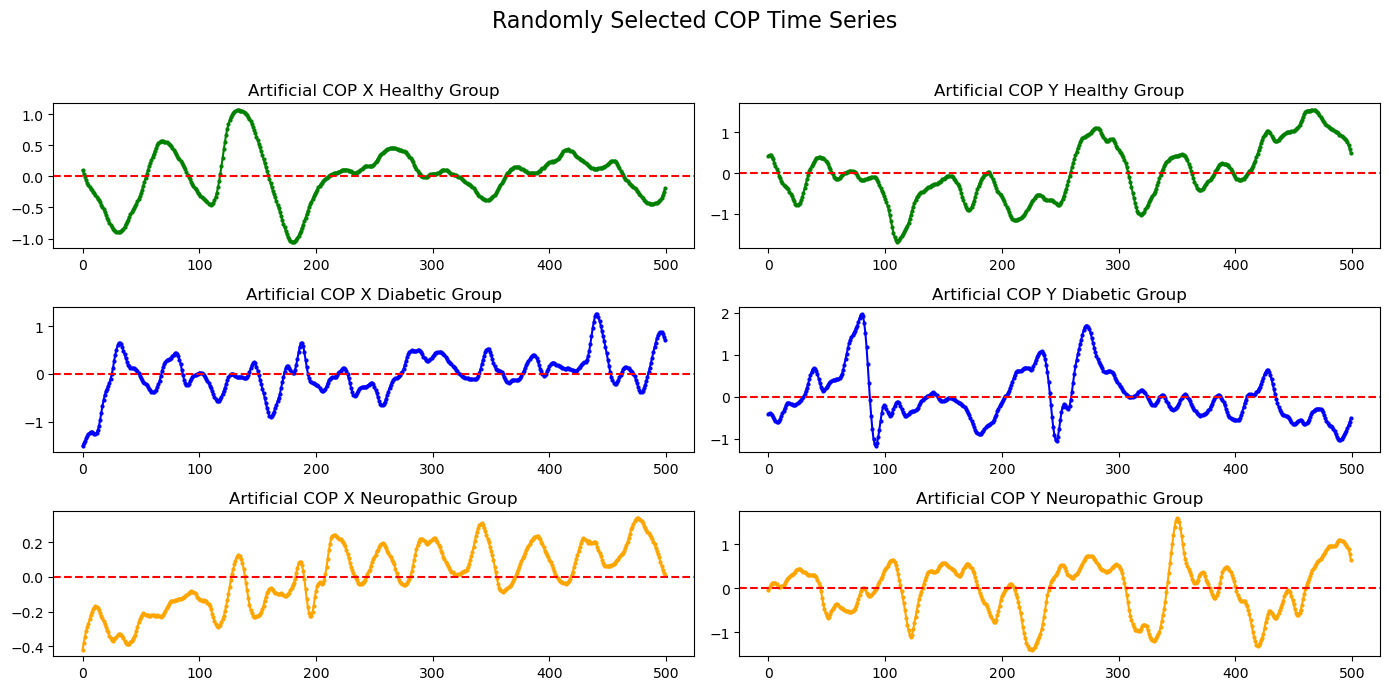

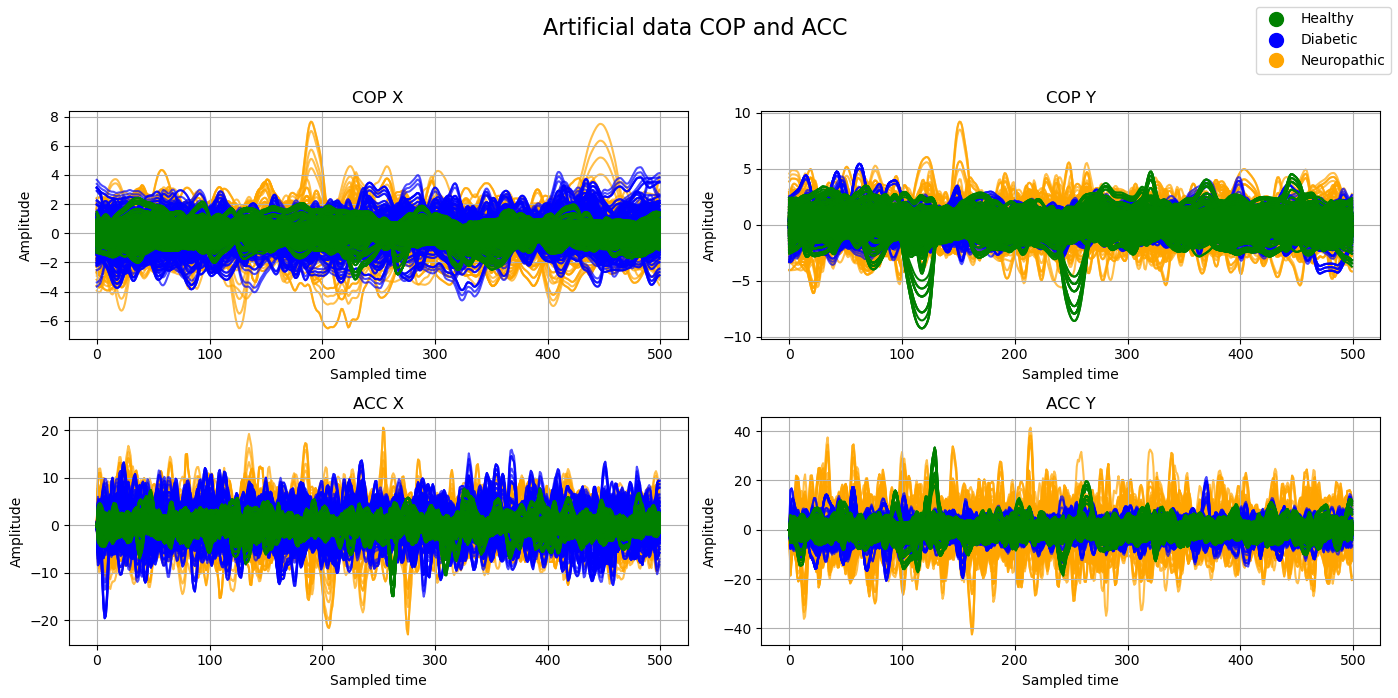

In [10]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(scaled_healthy_cop_x))
diabetic_random_number = random.randint(0, len(scaled_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(scaled_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(scaled_healthy_cop_x[healthy_random_number], scaled_healthy_cop_y[healthy_random_number],
                     scaled_diabetic_cop_x[diabetic_random_number], scaled_diabetic_cop_y[diabetic_random_number],
                     scaled_neuropathic_cop_x[neuropathic_random_number], scaled_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_scaled_series')
visualize.plot_cop_and_acc_time_series(scaled_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_scaled_series')

### Exportation

In [11]:
scaled_data.to_json('../data/processed/scaled_data.json', orient='records', lines=True)

## Random Shuffle

In [12]:
shuffled_healthy_cop_x = augmentations.random_shuffling(healthy_cop_x, num_samples=1600, slice_size=50)
shuffled_neuropathic_cop_x = augmentations.random_shuffling(neuropathic_cop_x, num_samples=1600, slice_size=50)
shuffled_diabetic_cop_x = augmentations.random_shuffling(diabetic_cop_x, num_samples=1600, slice_size=50)

shuffled_healthy_cop_y = augmentations.random_shuffling(healthy_cop_y, num_samples=1600, slice_size=50)
shuffled_neuropathic_cop_y = augmentations.random_shuffling(neuropathic_cop_y, num_samples=1600, slice_size=50)
shuffled_diabetic_cop_y = augmentations.random_shuffling(diabetic_cop_y, num_samples=1600, slice_size=50)



shuffled_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(shuffled_healthy_cop_x), pd.Series(shuffled_neuropathic_cop_x), pd.Series(shuffled_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(shuffled_healthy_cop_y), pd.Series(shuffled_neuropathic_cop_y), pd.Series(shuffled_diabetic_cop_y)]),
    'class': ['Healthy'] * len(shuffled_healthy_cop_x) + ['Neuropathic'] * len(shuffled_neuropathic_cop_x) + ['Diabetic'] * len(shuffled_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.add_acceleration_columns(shuffled_data)

Calculando aceleraciones: 100%|██████████| 4800/4800 [00:00<00:00, 9925.85it/s]


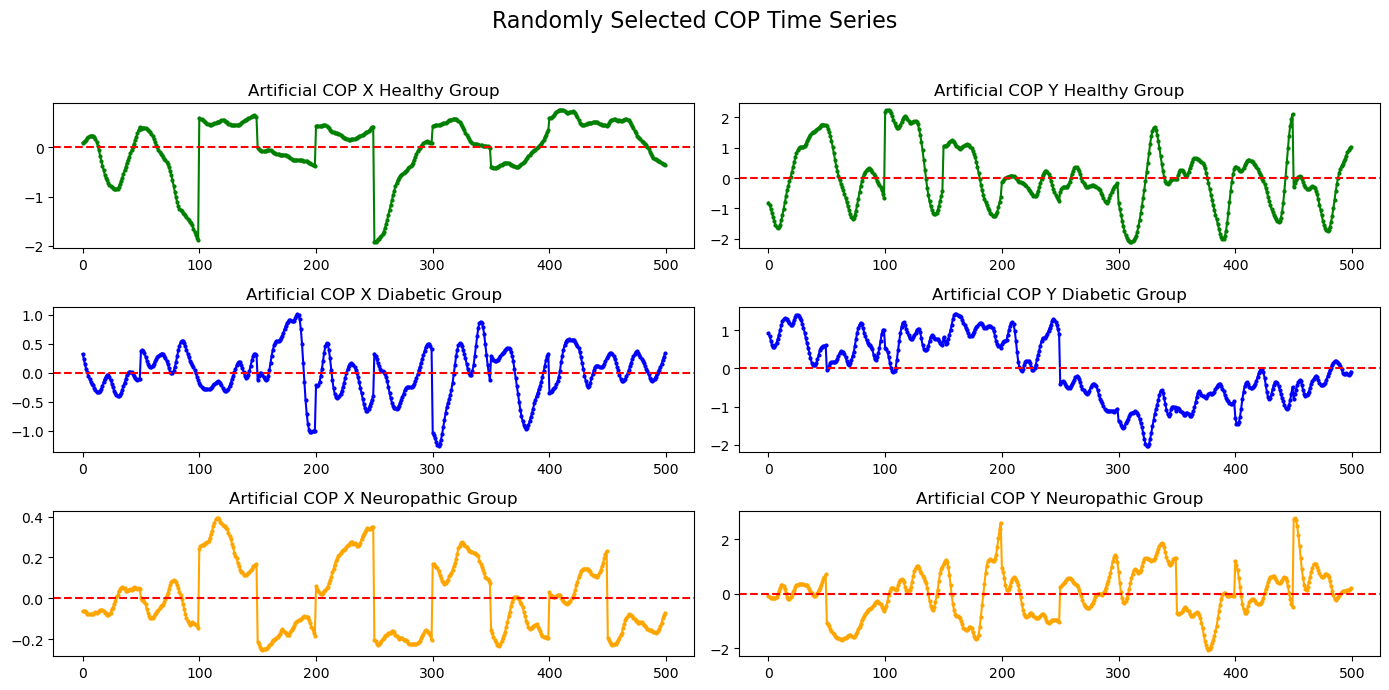

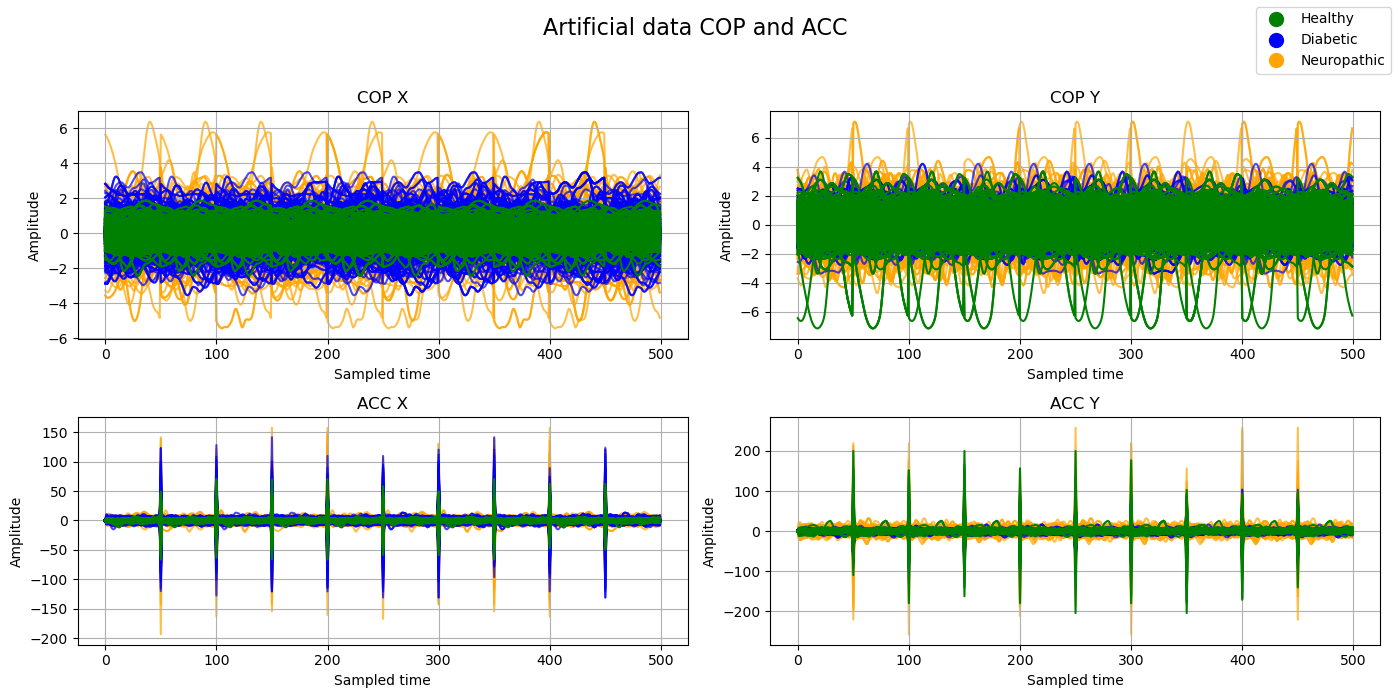

In [13]:
# Obtener un valor random de los datos
healthy_random_number = random.randint(0, len(shuffled_healthy_cop_x))
diabetic_random_number = random.randint(0, len(shuffled_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(shuffled_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(shuffled_healthy_cop_x[healthy_random_number], shuffled_healthy_cop_y[healthy_random_number],
                     shuffled_diabetic_cop_x[diabetic_random_number], shuffled_diabetic_cop_y[diabetic_random_number],
                     shuffled_neuropathic_cop_x[neuropathic_random_number], shuffled_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_shuffled_series')
visualize.plot_cop_and_acc_time_series(shuffled_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_shuffled_series')

### Export

In [14]:
shuffled_data.to_json('../data/processed/shuffled_data.json', orient='records', lines=True)

## Window Warping

In [15]:
winWarp_healthy_cop_x = augmentations.window_warping(healthy_cop_x, num_samples=1600)
winWarp_neuropathic_cop_x = augmentations.window_warping(neuropathic_cop_x, num_samples=1600)
winWarp_diabetic_cop_x = augmentations.window_warping(diabetic_cop_x, num_samples=1600)

winWarp_healthy_cop_y = augmentations.window_warping(healthy_cop_y, num_samples=1600)
winWarp_neuropathic_cop_y = augmentations.window_warping(neuropathic_cop_y, num_samples=1600)
winWarp_diabetic_cop_y = augmentations.window_warping(diabetic_cop_y, num_samples=1600)



winWarp_data = pd.DataFrame({
    'cop_x': pd.concat([pd.Series(winWarp_healthy_cop_x), pd.Series(winWarp_neuropathic_cop_x), pd.Series(winWarp_diabetic_cop_x)]),
    'cop_y': pd.concat([pd.Series(winWarp_healthy_cop_y), pd.Series(winWarp_neuropathic_cop_y), pd.Series(winWarp_diabetic_cop_y)]),
    'class': ['Healthy'] * len(winWarp_healthy_cop_x) + ['Neuropathic'] * len(winWarp_neuropathic_cop_x) + ['Diabetic'] * len(winWarp_diabetic_cop_x),
    'flag': 'augmented'
})

extractions.add_acceleration_columns(winWarp_data)

Calculando aceleraciones: 100%|██████████| 4800/4800 [00:00<00:00, 9897.10it/s]


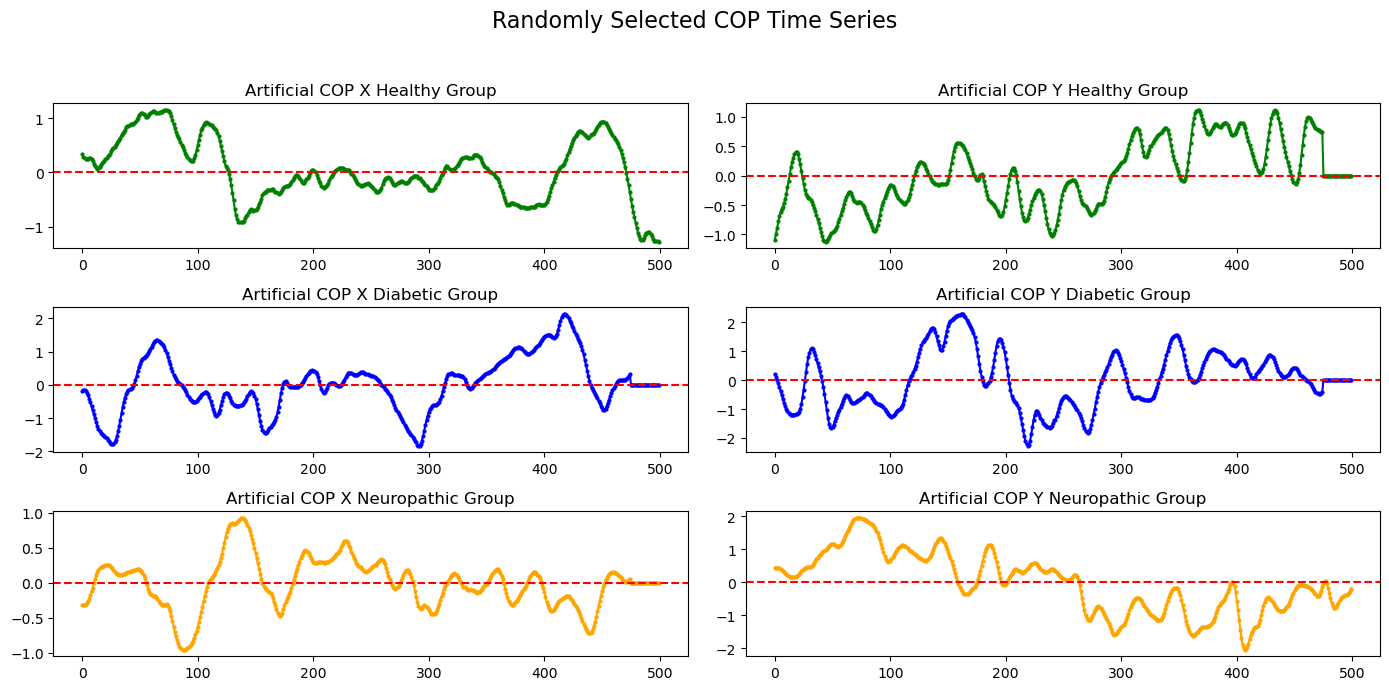

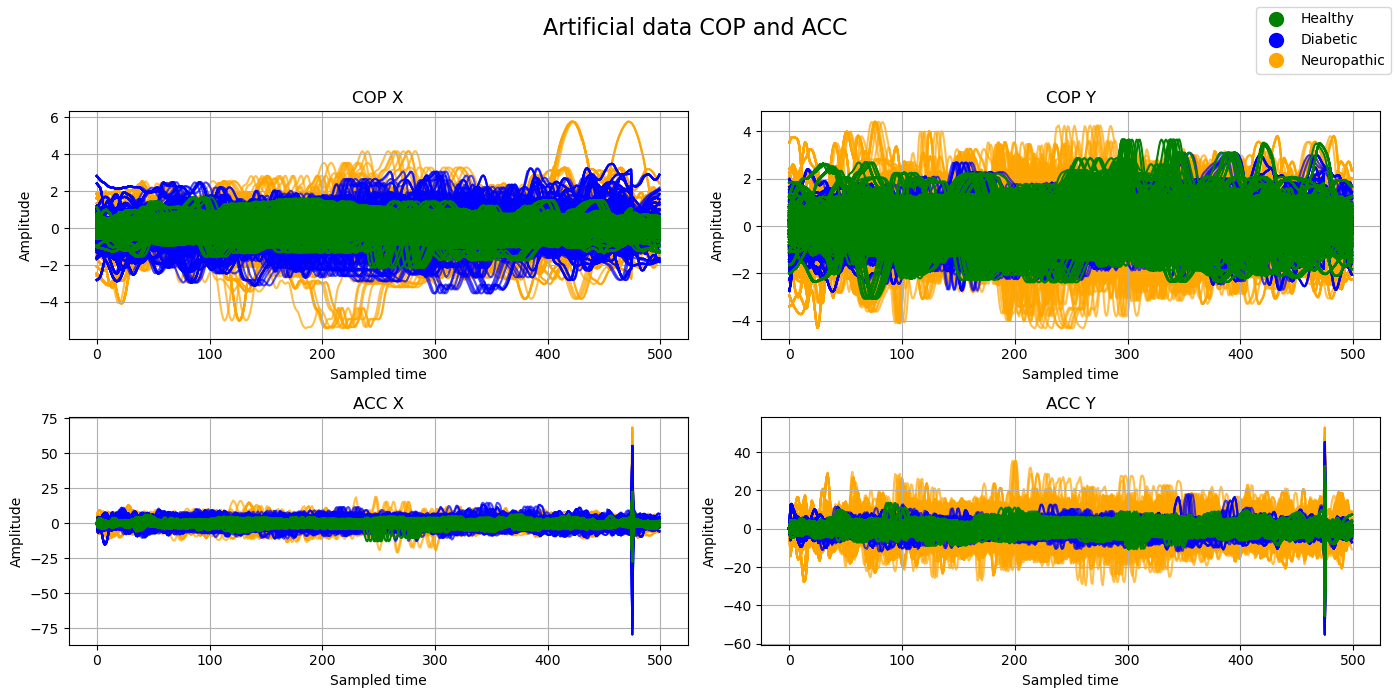

In [16]:

healthy_random_number = random.randint(0, len(winWarp_healthy_cop_x))
diabetic_random_number = random.randint(0, len(winWarp_diabetic_cop_x))
neuropathic_random_number = random.randint(0, len(winWarp_neuropathic_cop_x))

# Graficar las series de tiempo invertidas
visualize.plot_cop_time_series(winWarp_healthy_cop_x[healthy_random_number], winWarp_healthy_cop_y[healthy_random_number],
                     winWarp_diabetic_cop_x[diabetic_random_number], winWarp_diabetic_cop_y[diabetic_random_number],
                     winWarp_neuropathic_cop_x[neuropathic_random_number], winWarp_neuropathic_cop_y[neuropathic_random_number], export_filename='cop_random_winWarp_series')
visualize.plot_cop_and_acc_time_series(winWarp_data, alt_title='Artificial data COP and ACC', export_filename='cop_acc_winWarp_series')

In [17]:
winWarp_data.to_json('../data/processed/winWarp_data.json', orient='records', lines=True)

## SPAWNER